In [2]:
# Импорт библиотек для работы с данными
import pandas as pd
import numpy as np
import scipy.stats as stats

# Импорт библиотек для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Импорт библиотек для пред обработки данных
from sklearn.preprocessing import MaxAbsScaler, RobustScaler

# Импорт библиотек для отбора признаков
from sklearn.feature_selection import RFE, RFECV, SelectFromModel, SelectFpr, chi2

# Импорт библиотек линейной регрессии
import statsmodels.api as sm
from statsmodels.regression.recursive_ls import RecursiveLS
from statsmodels.regression.linear_model import OLS, GLS, GLSAR, WLS


# Импорт библиотек для машинного обучения
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("input/data.csv", delimiter=";")
# data = data.drop(columns=['Год'])
data.head()

,Год,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1998,87211.83,328497.9,638450.60,228548.4,803.2,5780.87,1212184.0,33.8,83359.41,25719.20,6171.0,6642.0,111458.0,1393.30
1,1999,119302.33,695059.8,789466.92,488395.1,787.6,5823.01,1272744.0,35.2,87820.24,25262.15,7260.0,7814.0,185861.0,1807.80
2,2000,156215.00,1159034.0,962057.00,748241.8,1472.8,5865.15,1444737.0,32.4,92700.80,25720.20,8067.0,9194.0,309534.0,2185.00
3,2001,173839.00,1370182.8,1393532.20,1008088.5,1154.6,5907.28,1841258.0,30.4,98088.36,24905.88,5545.0,12637.0,418289.0,2385.26
4,2002,220396.00,1767476.7,1771073.00,1267935.2,1508.7,5961.24,2255912.0,35.1,104100.59,25084.01,6932.0,13817.0,589139.0,2918.55


In [4]:
# добавляем нормальный шум с средним значением 0 и стандартным отклонением 0.1
noise = np.random.normal(0, 0.1, data.shape)
noisy_data = data + noise
noisy_data.head()

,Год,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1997.974686,87211.895401,3.284980e+05,6.384505e+05,2.285484e+05,803.124156,5780.769543,1.212184e+06,34.060536,83359.483362,25719.257198,6171.113826,6641.931379,111458.033036,1393.433149
1,1998.917621,119302.436645,6.950597e+05,7.894671e+05,4.883950e+05,787.750033,5822.958844,1.272744e+06,35.373474,87820.477587,25262.144036,7259.933945,7814.165717,185861.110594,1807.879505
2,2000.166565,156214.895433,1.159034e+06,9.620570e+05,7.482418e+05,1472.724681,5865.153042,1.444737e+06,32.482282,92700.750222,25720.100318,8067.091003,9194.087588,309534.058474,2184.825996
3,2001.111148,173839.066883,1.370183e+06,1.393532e+06,1.008088e+06,1154.572178,5907.209256,1.841258e+06,30.492523,98088.324474,24905.834073,5544.940218,12637.038602,418289.117678,2385.139102
4,2002.063593,220396.041648,1.767477e+06,1.771073e+06,1.267935e+06,1508.481724,5961.353149,2.255912e+06,34.920577,104100.593432,25083.934678,6932.018755,13817.083570,589139.034656,2918.626144


In [5]:
# Преобразуем столбец с датой в формат datetime
data['Год'] = pd.to_datetime(data['Год'].astype(str), format='%Y')
data.head()

,Год,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1998-01-01,87211.83,328497.9,638450.60,228548.4,803.2,5780.87,1212184.0,33.8,83359.41,25719.20,6171.0,6642.0,111458.0,1393.30
1,1999-01-01,119302.33,695059.8,789466.92,488395.1,787.6,5823.01,1272744.0,35.2,87820.24,25262.15,7260.0,7814.0,185861.0,1807.80
2,2000-01-01,156215.00,1159034.0,962057.00,748241.8,1472.8,5865.15,1444737.0,32.4,92700.80,25720.20,8067.0,9194.0,309534.0,2185.00
3,2001-01-01,173839.00,1370182.8,1393532.20,1008088.5,1154.6,5907.28,1841258.0,30.4,98088.36,24905.88,5545.0,12637.0,418289.0,2385.26
4,2002-01-01,220396.00,1767476.7,1771073.00,1267935.2,1508.7,5961.24,2255912.0,35.1,104100.59,25084.01,6932.0,13817.0,589139.0,2918.55


In [6]:
# Устанавливаем столбец с датой в качестве индекса DataFrame
data.set_index('Год', inplace=True)
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-01-01,87211.83,328497.9,638450.60,228548.4,803.2,5780.87,1212184.0,33.8,83359.41,25719.20,6171.0,6642.0,111458.0,1393.30
1999-01-01,119302.33,695059.8,789466.92,488395.1,787.6,5823.01,1272744.0,35.2,87820.24,25262.15,7260.0,7814.0,185861.0,1807.80
2000-01-01,156215.00,1159034.0,962057.00,748241.8,1472.8,5865.15,1444737.0,32.4,92700.80,25720.20,8067.0,9194.0,309534.0,2185.00
2001-01-01,173839.00,1370182.8,1393532.20,1008088.5,1154.6,5907.28,1841258.0,30.4,98088.36,24905.88,5545.0,12637.0,418289.0,2385.26
2002-01-01,220396.00,1767476.7,1771073.00,1267935.2,1508.7,5961.24,2255912.0,35.1,104100.59,25084.01,6932.0,13817.0,589139.0,2918.55


In [7]:
# Используем метод resample() для ресэмплинга данных по кварталам
data_quarterly = data.resample('Q').interpolate()
data_quarterly.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Используем метод resample() с параметром fill_method для достройки данных
data_quarterly_all_years = data_quarterly.resample('Q').interpolate()
data_quarterly_all_years.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Год'>

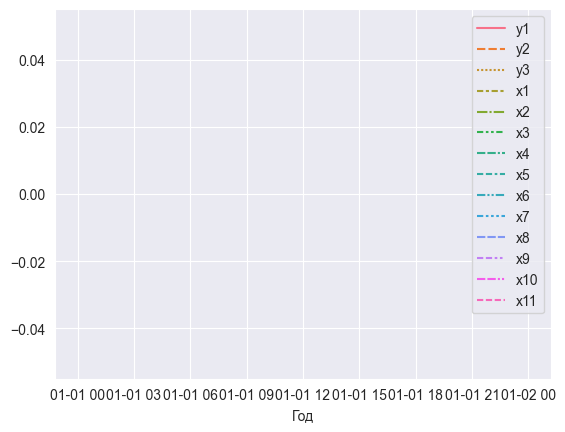

In [9]:
sns.lineplot(data=data_quarterly_all_years)